# CLASE 4.3: OPTIMIZACIÓN
---
## Introducción.
Cuando colgamos una foto en la pared, a veces es difícil dejarla bien derecha. En general, queremos hacer un determinado ajuste, detenernos, evaluar la horizontalidad de la foto, y volver a repetir el proceso. Dicha secuencia de acciones es un ejemplo (trivial, si nos permitimos la licencia de decirlo así...) de resolución de un problema de optimización. Estamos cambiando la orientación de nuestra foto hasta que satisfaga nuestro requerimiento. Esto es, que su ángulo respecto de la horizontal sea igual a cero.

Un **problema de optimización** puede definirse *a groso modo* como uno que posee *infinitas* soluciones, pero sólo una que podemos denominar, bajo determinados criterios, como la *mejor* solución de todas ellas. El conjunto de infinitas soluciones que podemos asumir, en primera instancia, como *candidatas* para resolver nuestro problema suele denominarse como **espacio de soluciones factibles** del mismo, mientras que la *mejor* solución de dicho espacio, que puede ser estimada por una generosa variedad de métodos tanto algebraicos como numéricos, suele denominarse como **solución óptima** del problema. El *criterio* que permite establecer cúal es la mejor solución en un problema de este tipo guarda relación con los valores que toma una función, denominada como **función objetivo**, sobre el conjunto de soluciones factibles. Normalmente, estamos interesados en el o los valores máximos y mínimos que toma dicha función.

Consideremos, por ejemplo, la función cuadrática $f(x)=(x-3)^{2}$. Queremos encontrar el valor de $x$ tal que $f$ alcanza su valor mínimo. En términos gráficos, al ser $f$ una función cuadrática, sabemos que ésta describe una parábola en $\mathbb{R}^{2}$ con concavidad positiva (apuntando *hacia arriba*). Por lo tanto, es evidente que $f$ tiene un valor mínimo justo en el vértice de dicha parábola, cuando $x=3$.

En general, del curso de cálculo diferencial, sabemos que toda función $f$ que satisfaga el [teorema de Rolle](https://en.wikipedia.org/wiki/Rolle%27s_theorem) será tal que, para todo intervalo abierto $(a, b)$ donde $f$ es diferenciable y $f(a)=f(b)$, siempre existirá un punto interior $c$, tal que $a<c<b$, donde $f'(c)=0$. El punto $x=c$ es llamado **punto crítico** de $f$, y dará lugar a un valor máximo o mínimo de $f$ dependiendo del signo de la derivada $f'(x)$ para puntos a ambos lados de $c$ (criterio de la primera derivada). Si nos referimos a la función cuadrática $f(x)=(x-3)^{2}$, es fácil determinar que $f'(x)=2(x-3)$, de donde sabemos que el único punto crítico de $f$ es $x_{0}=3$. Debido a que la derivada de $f$ es negativa a la izquierda de $x_{0}$ y positiva a la derecha de $x_{0}$, se tendrá que $x_{0}=3$ es un mínimo de $f$.

El ejemplo anterior pone de manifiesto un problema sencillo de optimización univariable que es resoluble de forma analítica, ya que conocemos la función objetivo y no existen restricciones que limiten el espacio de soluciones factibles del problema. Sin embargo, si esta función fuese matemáticamente de mayor complejidad (por ejemplo, si la correspondiente expresión tuviera múltiples términos, varios puntos con derivada nula –máximos y/o mínimos locales, o puntos de ensilladura, que son puntos donde la derivada es nula, pero que no resultan en valores máximos y/o mínimos–, relaciones no lineales, o fuera dependiente de más de una variable), su optimización por métodos manuales sería, como mínimo, una misión extremadamente ardua y muchas veces imposible de resolver en términos algebraicos.

Podemos imaginar a la función objetivo en un problema de optimización como la representación de un paisaje, digamos de un valle, para el cual deseamos encontrar el punto con la mínima elevación posible. Tal analogía pone de manifiesto unq de las principales dificultades al enfrentarnos a un problema de este tipo: Si estuviéramos parados en cualquier valle, con montañas a nuestro alrededor ¿Cómo sabemos si aquel valle es el punto más bajo en toda la extensión de interés? O bien ¿Este valle es el más bajo, siendo que hay otros valles más allá de dichas montañas? En una jerga más formal ¿Cómo sabemos si no nos encontramos en un mínimo local, que corresponde a un valor mínimo de la función objetivo, pero sólo en un entorno local?

## Conceptos preliminares.
La situación presentada previamente pone de manifiesto que un problema de optimización corresponde a un desafío que puede resultar significativamente difícil bajo determinadas condiciones. Para poder entender dicha dificultad, será bueno refrescar algunos conocimientos que, en general, son repasados en detalle en los cursos de cálculo diferencial. No nos extenderemos demasiado aquí en ellos, pero sí será útil tenerlos en consideración. Ante todo, intentaremos dar ejemplos gráficos de lo que estamos hablando, para lo cual haremos un uso intensivo de la librería **Matplotlib**, a fin de graficar algunos resultados. Por supuesto, nos apoyaremos igualmente con **Numpy**, a fin de construir algunos arreglos de datos que nos permitirán describir ciertas funciones de interés:

In [1]:
# Importación de librerías.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sympy as sp

In [2]:
from IPython.core.display import HTML
from mpl_toolkits import mplot3d

In [3]:
# Setting de parámetros de graficación.
sns.set()
plt.rcParams["figure.dpi"] = 100 # Resolución de nuestras figuras.
plt.style.use("seaborn-v0_8-white") # Template de estilo.

In [4]:
# Centramos el output de los gráficos en este notebook.
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [5]:
# Inicializamos el sistema de impresión de resultados simbólicos de Sympy.
sp.init_printing()

In [6]:
%matplotlib notebook

En lo que resta de esta subsección, trabajaremos con campos escalares. Esto es, funciones reales o escalares de variable vectorial, del tipo $f:U\subseteq \mathbb{R}^{n} \rightarrow \mathbb{R}$, para $n\geq 2$, donde $U$ es un conjunto abierto de $\mathbb{R}^{n}$. Estamos interesados en resolver, mediante herramientas computacionales, problemas del tipo:

$$\begin{array}{ll}\min_{\mathbf{x} } &f\left( \mathbf{x} \right)  \\ \mathrm{s} .\mathrm{a} .:&g_{i}\left( \mathbf{x} \right)  \leq 0\\ &h_{j}\left( \mathbf{x} \right)  =0\end{array}$$
</p> <p style="text-align: right;">$(3.1)$</p>

Donde $1\leq i\leq m$ y $1\leq j\leq p$, donde:
- $f:U\subseteq \mathbb{R}^{n} \rightarrow \mathbb{R}$ es una **función objetivo** que deseamos minimizar sobre el vector $\mathbf{x}$ de $n$ variables.
- El conjunto $g_{i}(\mathbf{x})=0$ es denominado **restricciones de desigualdad**.
- El conjunto $h_{j}(\mathbf{x})=0$ es denominado **restricciones de igualdad**.
- Y por supuesto, $m,p\geq 0$.

Si $m=p=0$, el problema (3.1), llamado **problema de optimización restringida**, se reduce a uno del tipo **no restringido**. Por convención, la forma estándar anterior define un problema de minimización. Un problema de maximización puede tratarse negando la función objetivo; es decir, escribiendo $\max(f(\mathbf{x}))=-\min(f(\mathbf{x}))$.

Sea $f:U\subseteq \mathbb{R}^{n} \rightarrow \mathbb{R}$ una función definida en el conjunto abierto $U$ de $\mathbb{R}^{n}$. Diremos que $f$ tiene un **mínimo (o un máximo) local o relativo** en el punto $x_{0}\in U$, si $f\left( \mathbf{x}_{0} \right)  \leq f\left( \mathbf{x} \right)$ ($f\left( \mathbf{x}_{0} \right)  \geq f\left( \mathbf{x} \right)$, respectivamente) para todo $\mathbf{x}$ en una bola $B$ de centro en $\mathbf{x}_{0}$. Es decir, al igual que en el caso de las funciones de una variable, la función $f$ tendrá un mínimo local en $\mathbf{x}_{0}\in U$ si $f(\mathbf{x}_{0})$ es el valor más pequeño de todos los valores de $f(\mathbf{x})$ para $\mathbf{x}$ en una bola $B$ de centro en $\mathbf{x}_{0}$.

Podemos observar un ejemplo sencillo del concepto anterior considerando la función $f(x,y)=x^{2}+y^{2}$, cuyo gráfico describe una superficie conocida como paraboloide circular. Dicha función tiene un mínimo global (absoluto, que es el valor mínimo de la función en todo su dominio) en el origen. Para comprobarlo, haremos uso las librerías que ya conocemos para graficar esta superficie en el entorno de dicho mínimo global:

In [7]:
# Definimos la función correspondiente.
def f(x, y):
    return x**2 + y**2

In [8]:
# Creamos un par de arreglos que limitarán la grilla completa de valores donde graficaremos f.
x = np.linspace(start=-5, stop=5, num=100)
y = np.linspace(start=-5, stop=5, num=100)

X, Y = np.meshgrid(x, y)

In [9]:
# Evaluamos f en esta grilla.
Z = f(X, Y)

<IPython.core.display.Javascript object>


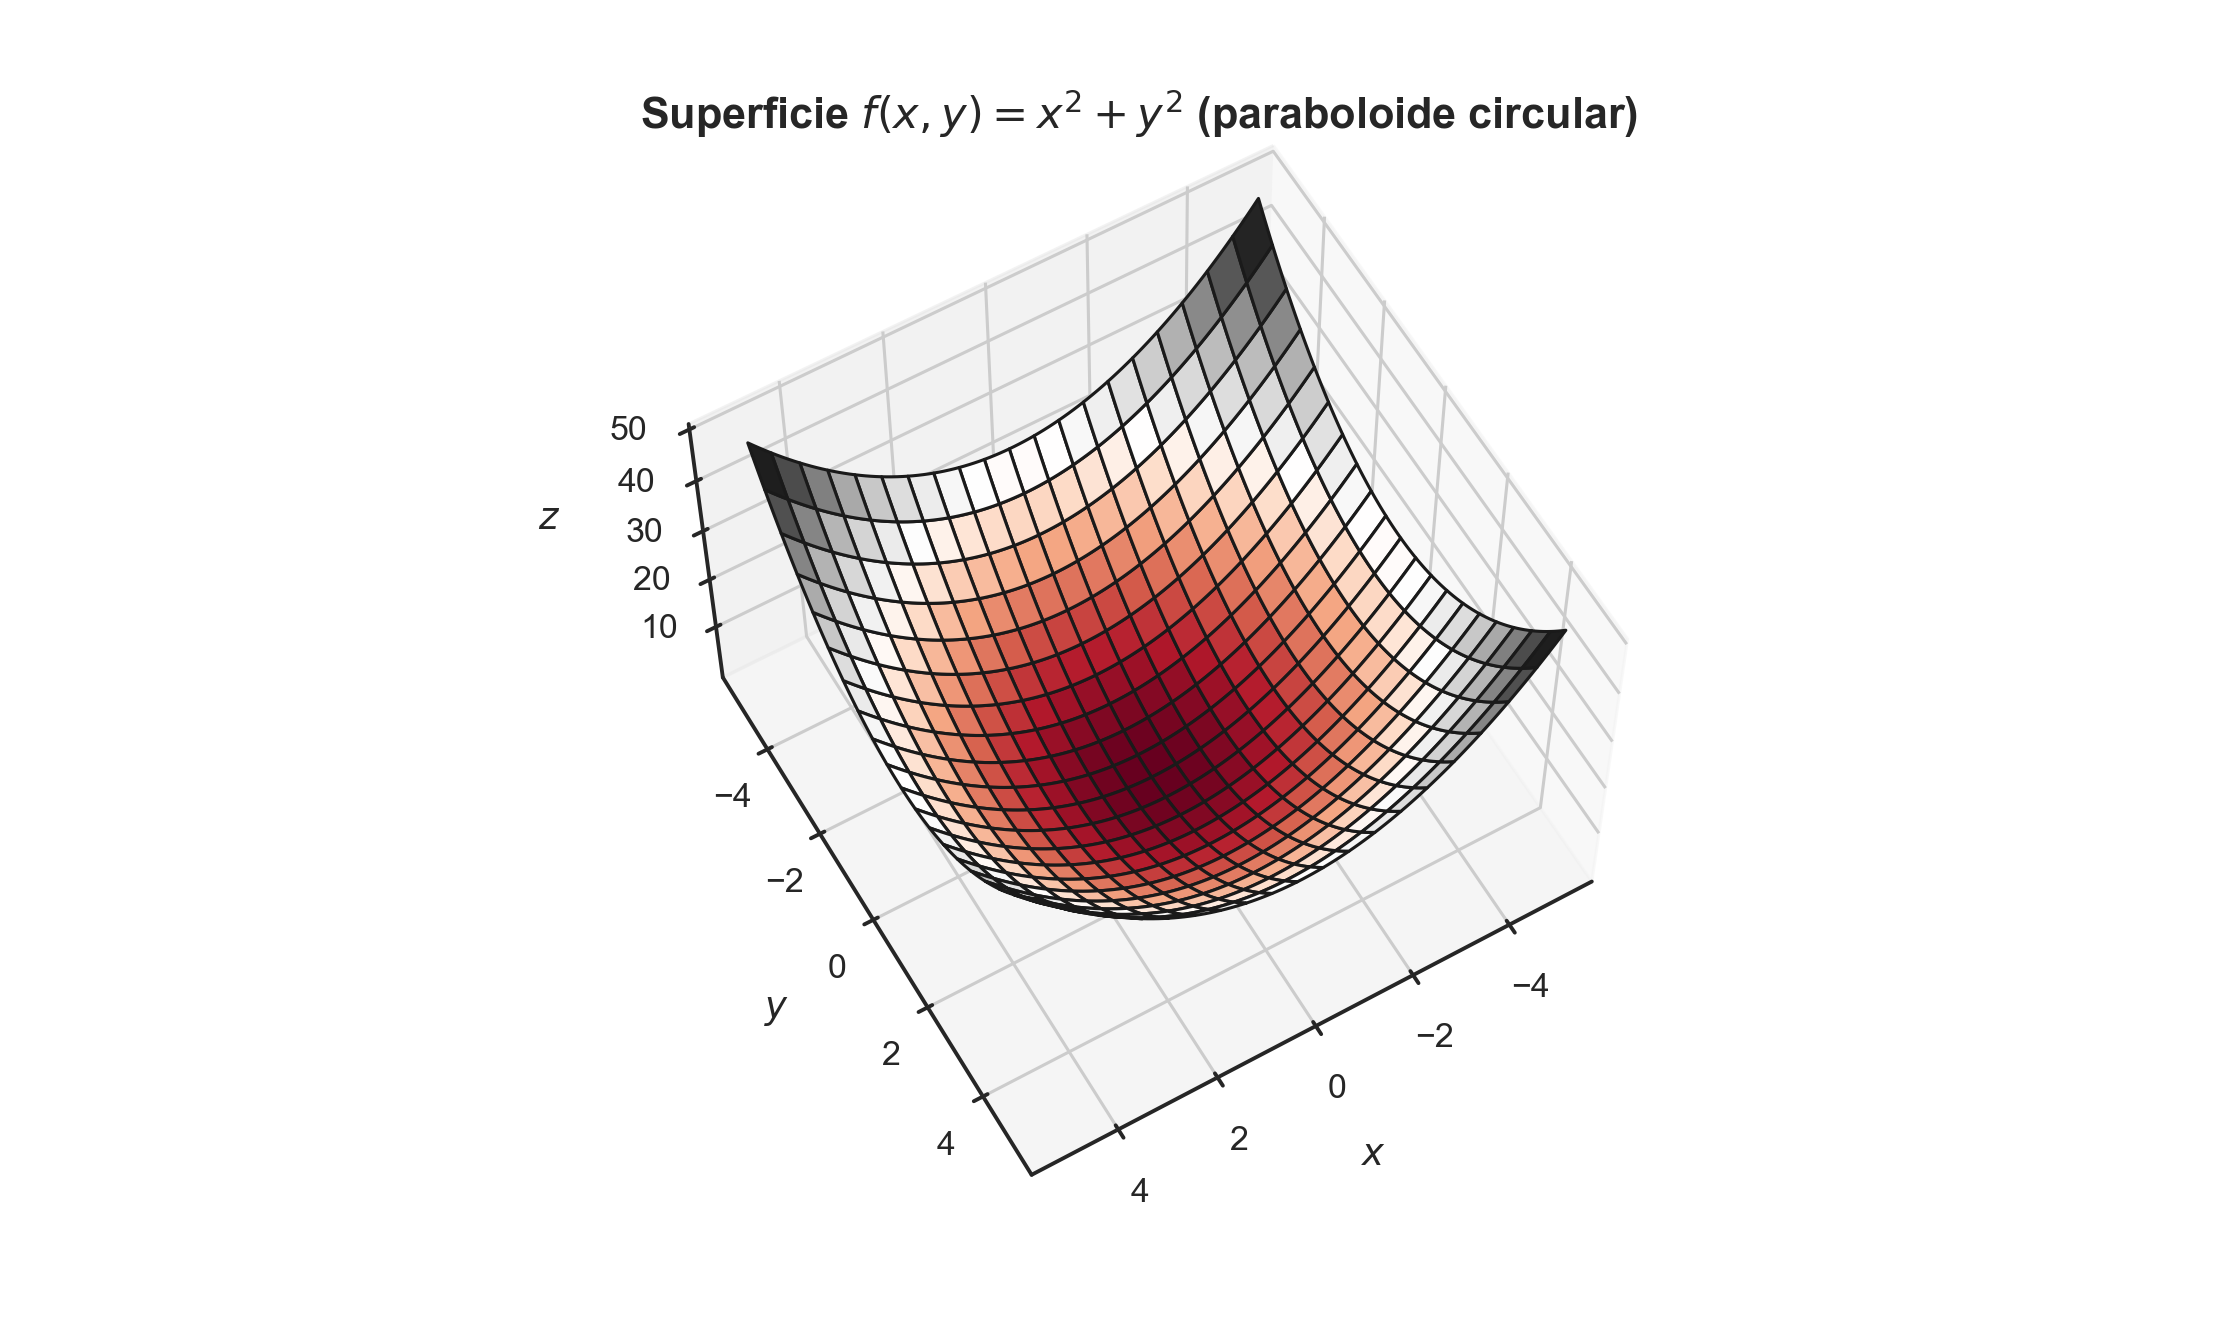

In [10]:
# Y construimos el gráfico de la superficie.
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=5, cstride=5, cmap='RdGy', edgecolor='k')
ax.set_xlabel(r"$x$", fontsize=12, labelpad=10)
ax.set_ylabel(r"$y$", fontsize=12, labelpad=10)
ax.set_zlabel(r"$z$", fontsize=12, labelpad=10)
ax.set_title(r'Superficie $f(x,y)=x^{2}+y^{2}$ (paraboloide circular)', fontsize=14, fontweight="bold", pad=10)
ax.view_init(60, 60);

<IPython.core.display.Javascript object>


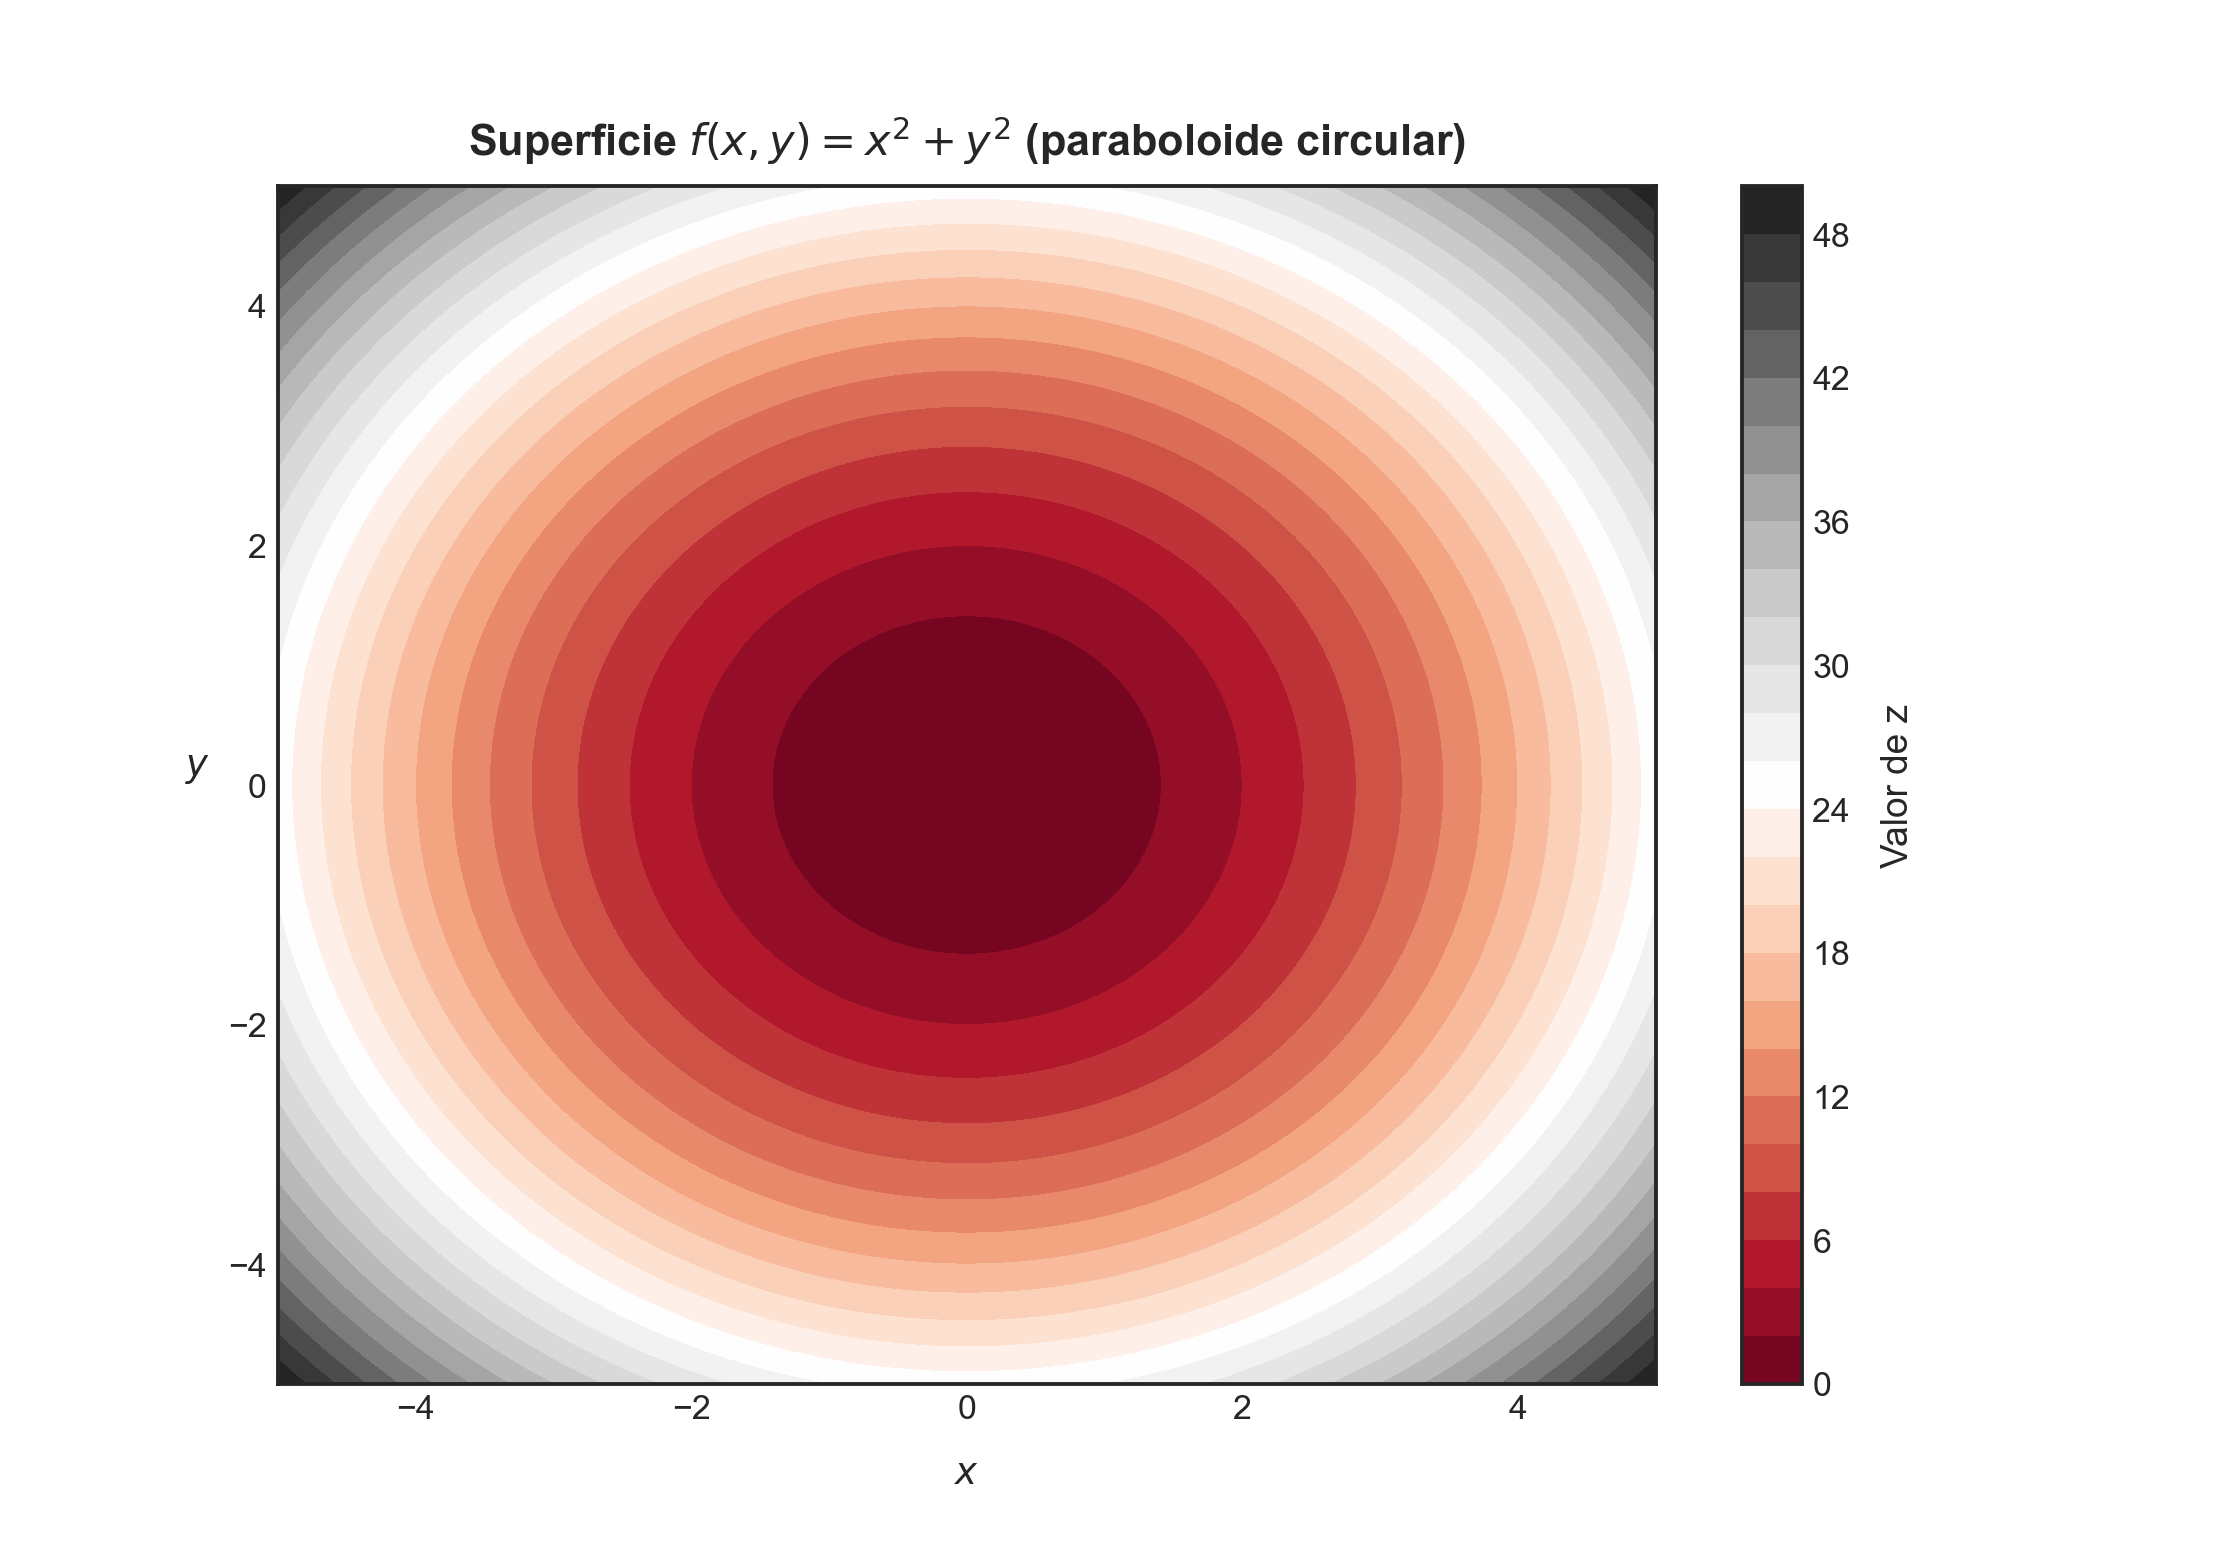

In [11]:
# Y creamos un gráfico de contorno completo para visualizar este mínimo global en 2D.
fig, ax = plt.subplots(figsize=(10, 7))
p = ax.contourf(X, Y, Z, levels=30, cmap='RdGy')
ax.set_xlabel(r"$x$", fontsize=12, labelpad=10)
ax.set_ylabel(r"$y$", fontsize=12, labelpad=10, rotation=0)
ax.set_title(r'Superficie $f(x,y)=x^{2}+y^{2}$ (paraboloide circular)', fontsize=14, fontweight="bold", pad=10)
cb = plt.colorbar(p)
cb.set_label("Valor de z", fontsize=12, labelpad=10);

Consideremos la función $f:U\subseteq \mathbb{R}^{n} \rightarrow \mathbb{R}$ definida en el conjunto abierto $U$ de $\mathbb{R}^{n}$. Sea $\bar{\mathbf{x}}\in U$. Si cualquier bola (de $\mathbb{R}^{n}$) con centro en $\bar{\mathbf{x}}$ contiene puntos $\mathbf{x}\in B$ tales que $f(\mathbf{x})-f(\bar{\mathbf{x}})>0$ y puntos $\mathbf{y}\in B$ tales que $f(\mathbf{y})-f(\bar{\mathbf{x}})>0$, entonces decimos que $\mathbf{x}$ es un **punto de ensilladura** (o punto silla) de la función $f$.

El aspecto de la gráfica de una función $f:U\subseteq \mathbb{R}^{2} \rightarrow \mathbb{R}$ en el entorno de un punto de ensilladura es, en efecto, en de una silla de montar. Un ejemplo clásico de un punto con estas características se puede observar en una superficie denominada paraboloide hiperbólico. Dicha superficie corresponde a la gráfica de la función $f\left( x,y\right)  =\frac{x^{2}}{a^{2}} -\frac{y^{2}}{b^{2}}$, con $a, b>0$. Podemos graficar dicha función para tener una visualización completa del correspondiente punto de ensilladura:

In [12]:
# Definimos la función correspondiente.
def f(x, y, a, b):
    return x**2/a**2 - y**2/b**2

In [13]:
# Evaluamos f en la grilla anterior.
Z = f(X, Y, a=3, b=2)

<IPython.core.display.Javascript object>


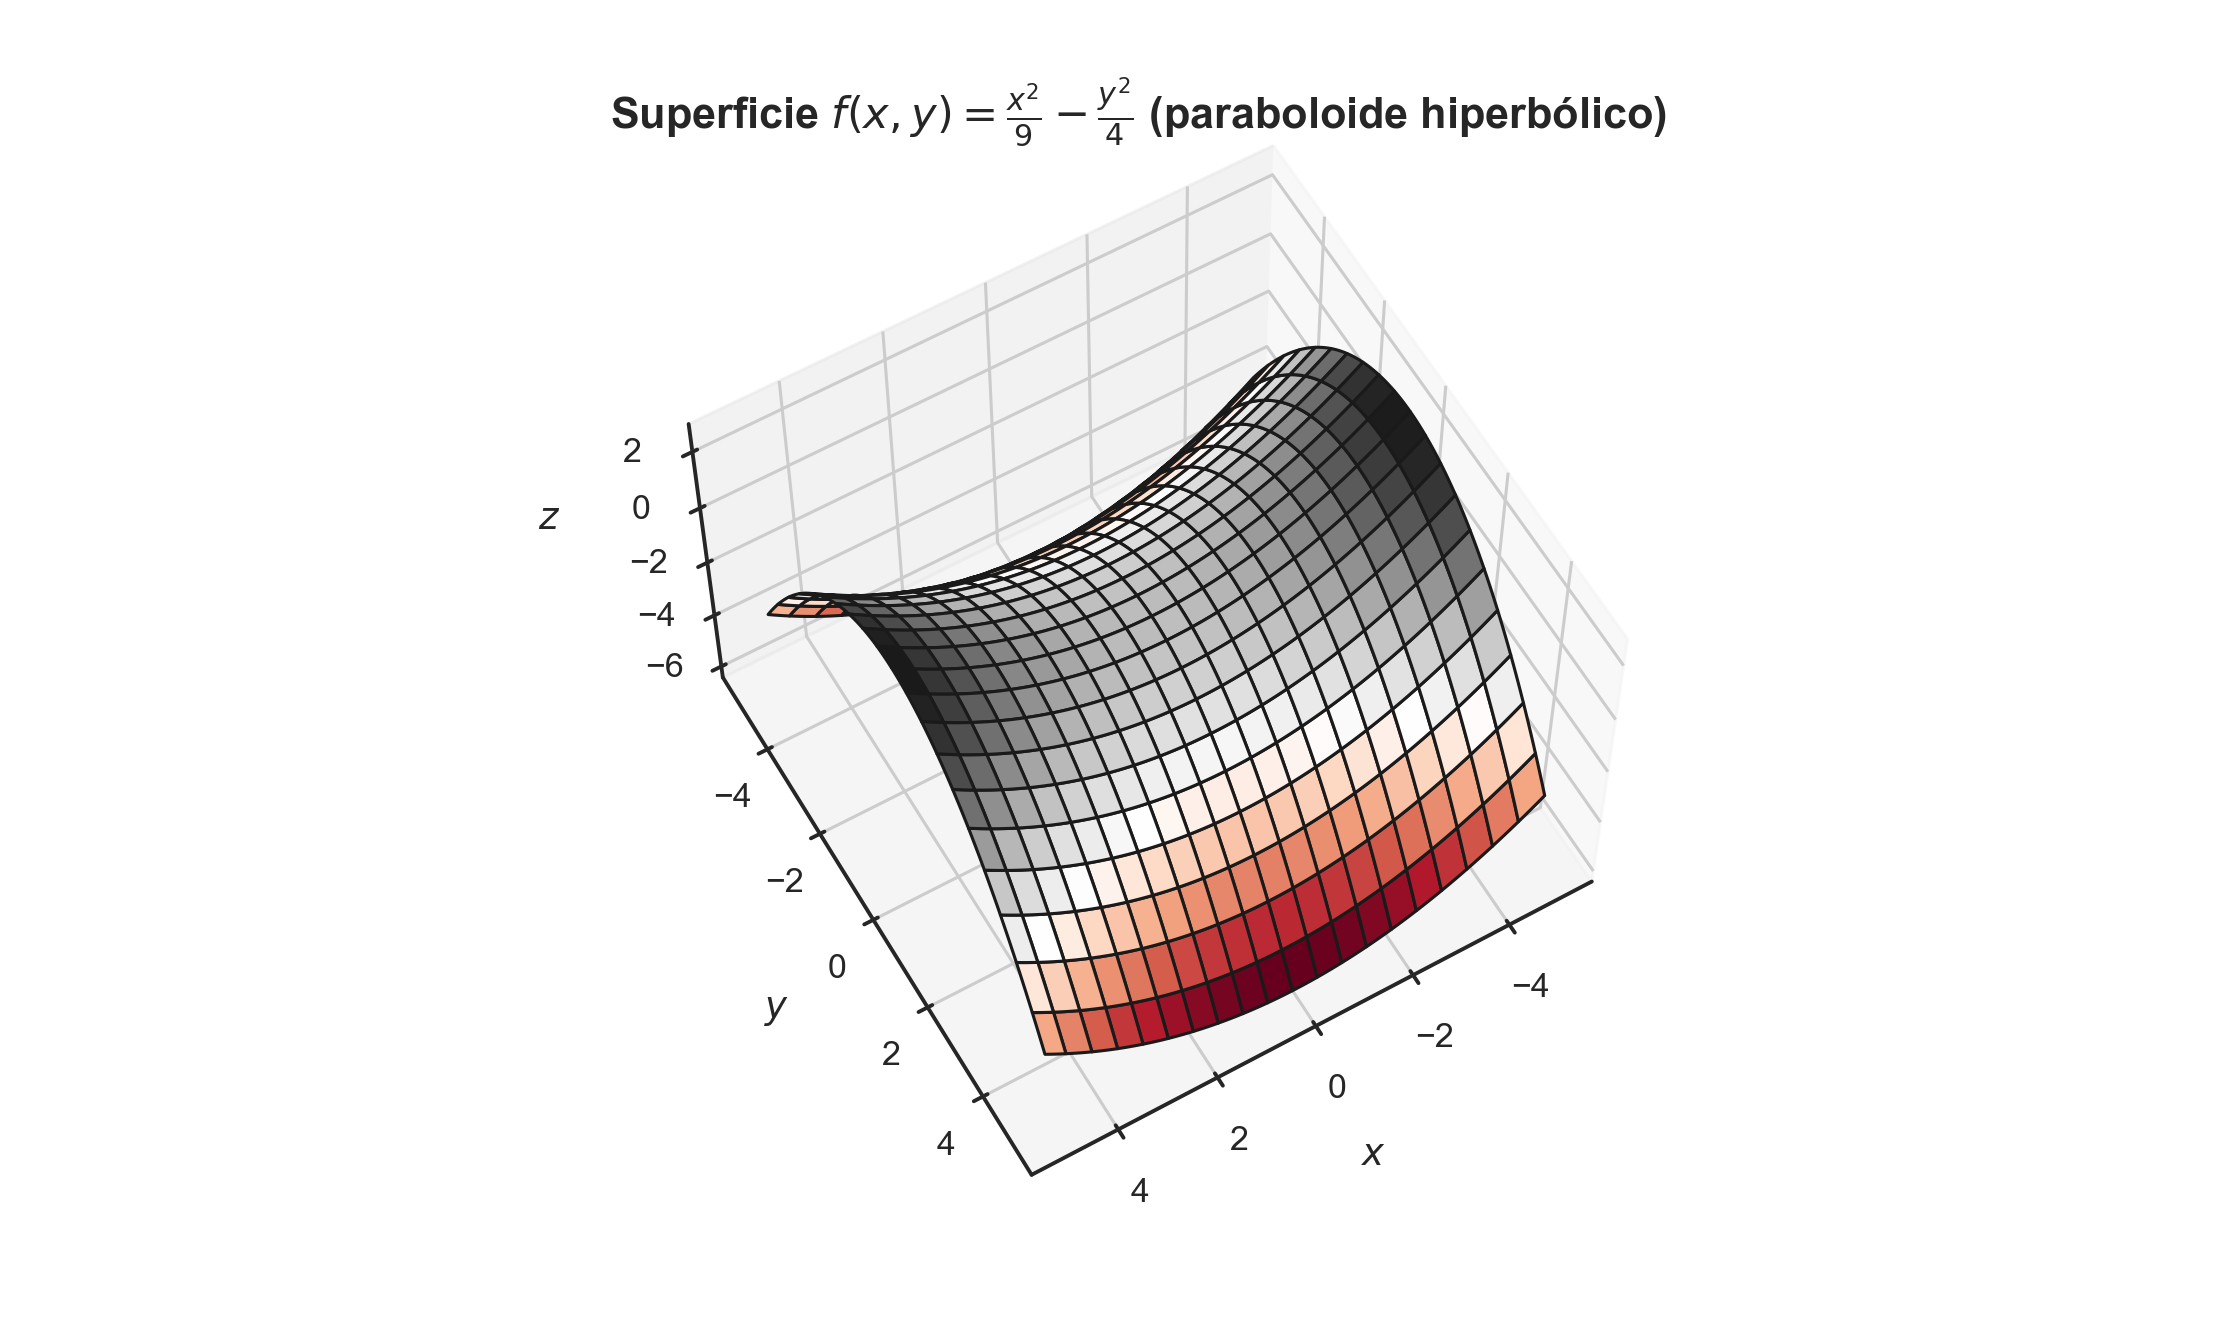

In [14]:
# Y construimos el gráfico de la superficie.
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=5, cstride=5, cmap='RdGy', edgecolor='k')
ax.set_xlabel(r"$x$", fontsize=12, labelpad=10)
ax.set_ylabel(r"$y$", fontsize=12, labelpad=10)
ax.set_zlabel(r"$z$", fontsize=12, labelpad=10)
ax.set_title(
    r'Superficie $f\left( x,y\right)  =\frac{x^{2}}{9} -\frac{y^{2}}{4}$ (paraboloide hiperbólico)', 
    fontsize=14, fontweight="bold", pad=10
)
ax.view_init(60, 60);

<IPython.core.display.Javascript object>


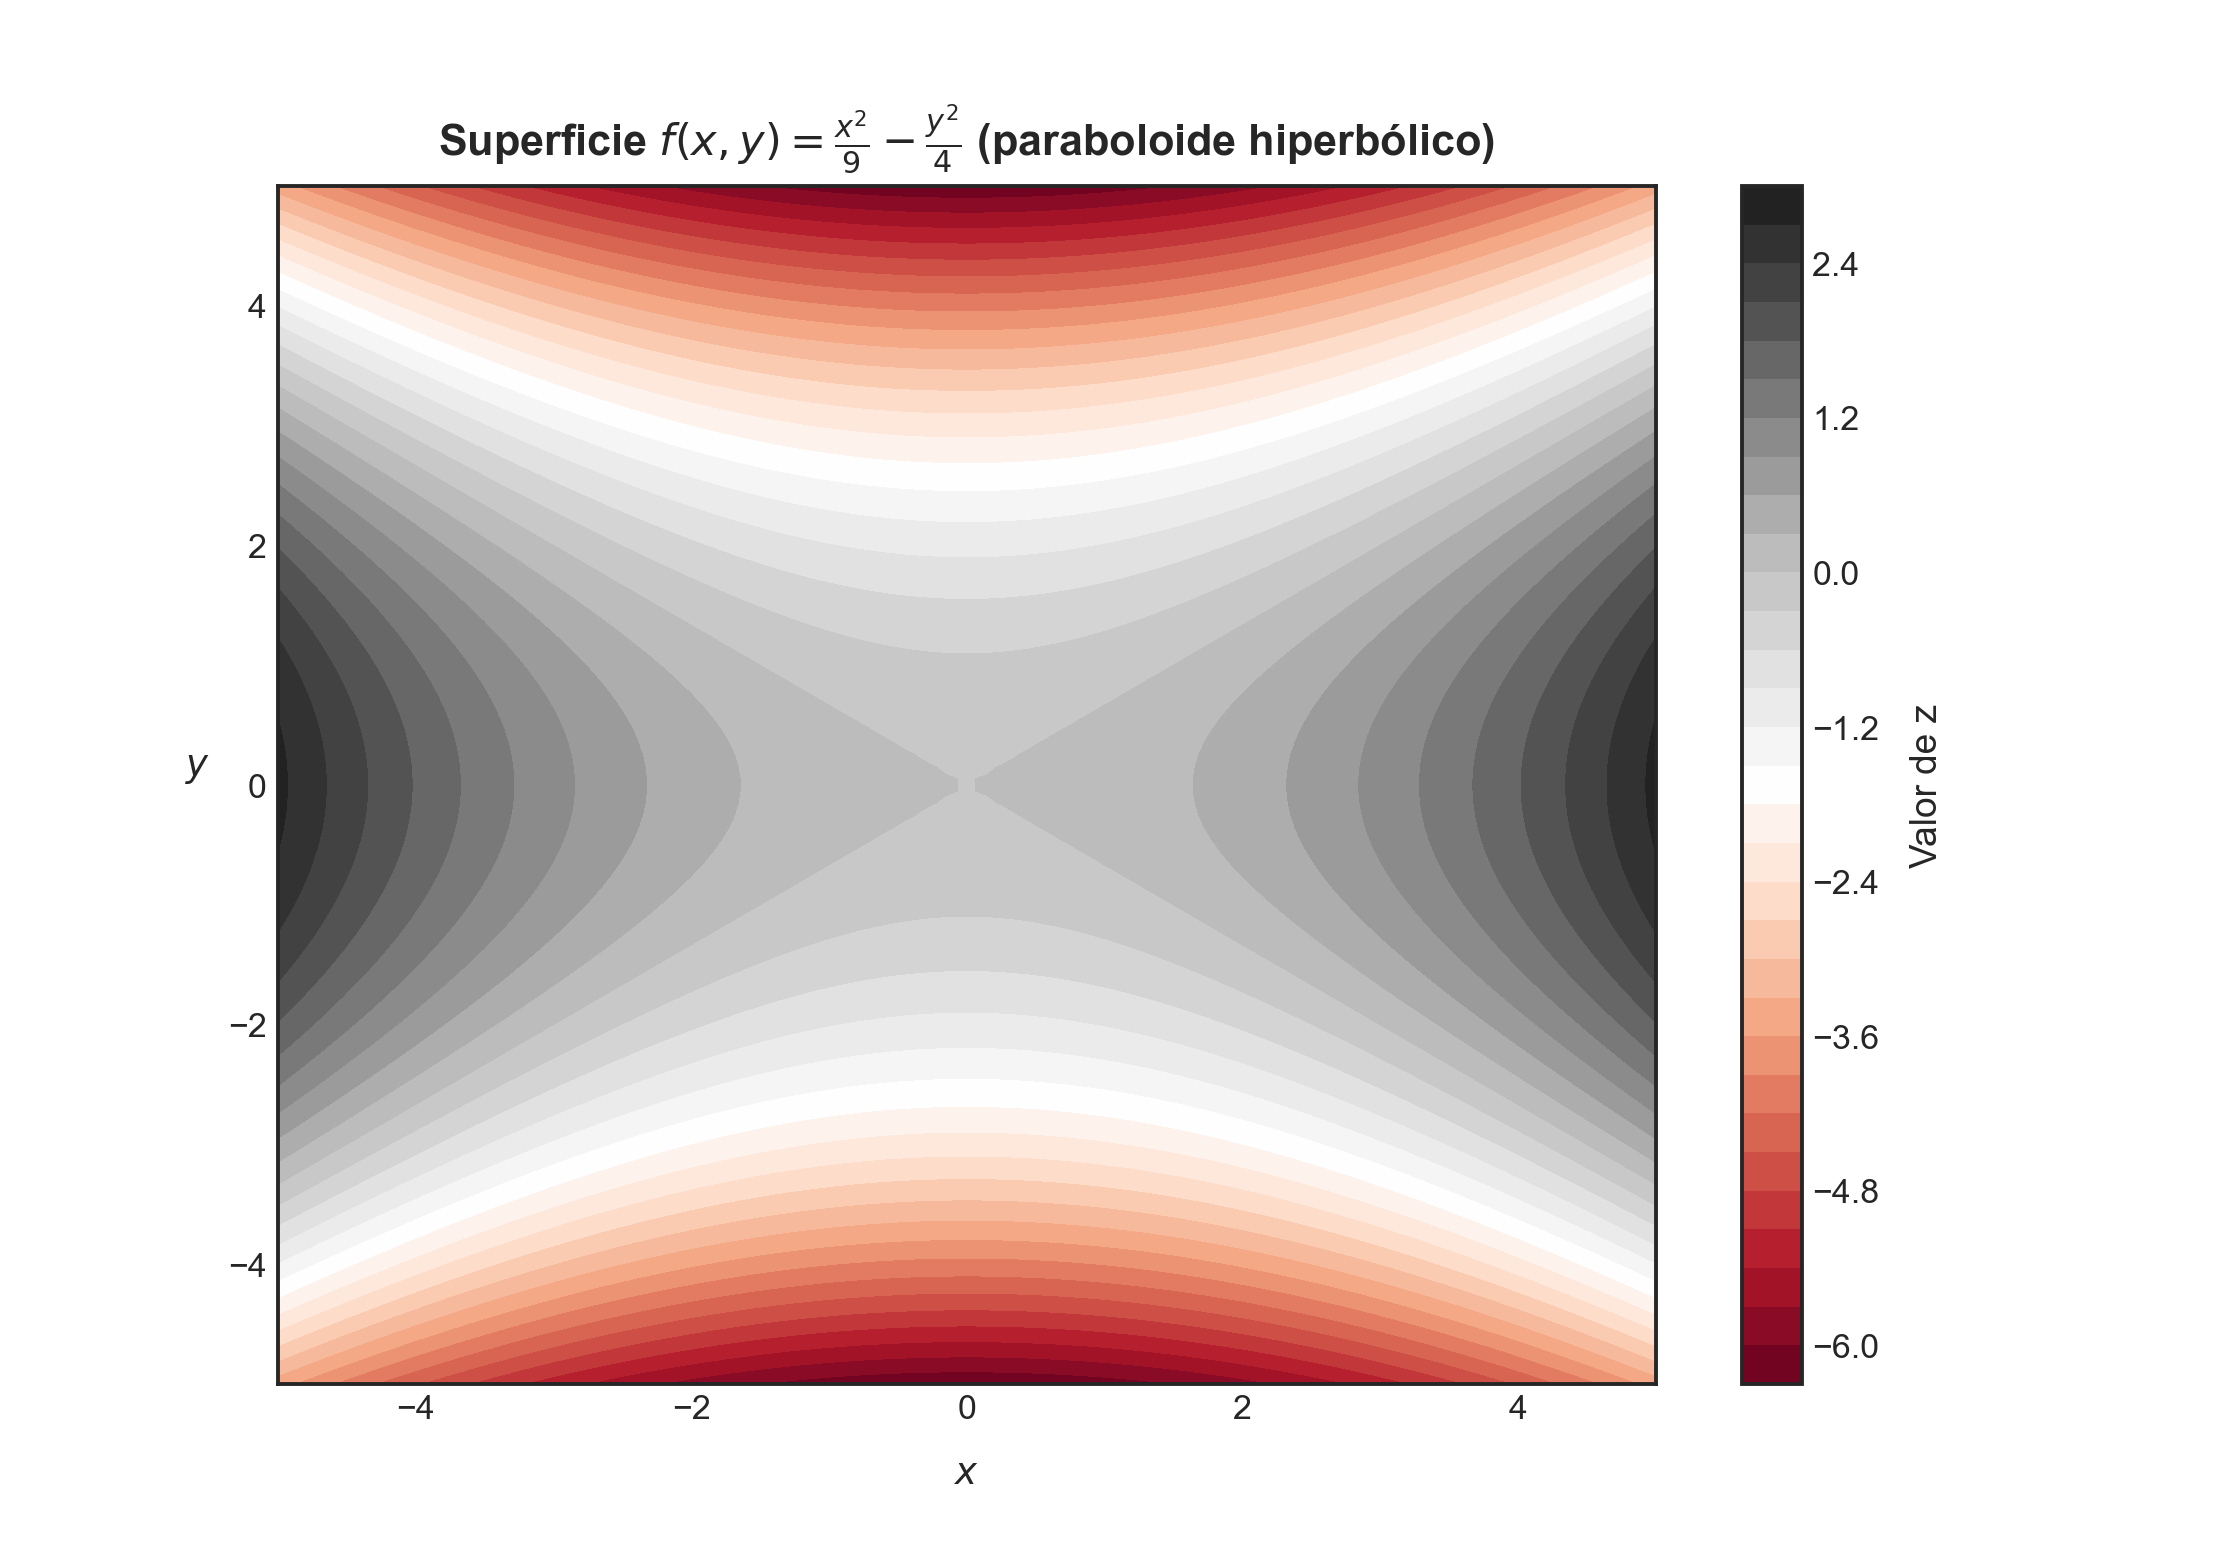

In [15]:
# Y creamos un gráfico de contorno completo para visualizar este mínimo global en 2D.
fig, ax = plt.subplots(figsize=(10, 7))
p = ax.contourf(X, Y, Z, levels=30, cmap='RdGy')
ax.set_xlabel(r"$x$", fontsize=12, labelpad=10)
ax.set_ylabel(r"$y$", fontsize=12, labelpad=10, rotation=0)
ax.set_title(
    r'Superficie $f\left( x,y\right)  =\frac{x^{2}}{9} -\frac{y^{2}}{4}$ (paraboloide hiperbólico)', 
    fontsize=14, fontweight="bold", pad=10
)
cb = plt.colorbar(p)
cb.set_label("Valor de z", fontsize=12, labelpad=10);

Sea $f:U\subseteq \mathbb{R}^{n} \rightarrow \mathbb{R}$ una función definida en el conjunto abierto $U$ de $\mathbb{R}^{n}$ y sea $\mathbf{x}_{0}$ un punto interior a $U$. Admitamos que $f$ es de clase $C^{2}$ en $U$; es decir, las derivadas parciales de segundo orden $\frac{\partial^{2} f}{\partial x_{i}\partial x_{j}}$ existen y son continuas en $\mathbf{x}_{0}$ (para $i,j\in \mathbb{N}, 1\leq i\leq n, 1\leq j\leq n$). A la matriz cuadrada de orden $n$, definida como

$$\mathbf{H} \left( \mathbf{x}_{0} \right)  =\left( \frac{\partial^{2} f}{\partial x_{i}\partial x_{j}} \left( \mathbf{x}_{0} \right)  \right)_{i,j=1,2,...,n}  =\displaystyle \left( \begin{array}{ccc}\displaystyle \frac{\partial^{2} f}{\partial x^{2}_{1}} &\cdots &\displaystyle \frac{\partial^{2} f}{\partial x_{1}\partial x_{n}} \\ \vdots &\ddots &\vdots \\ \displaystyle \frac{\partial^{2} f}{\partial x_{n}\partial x_{1}} &\cdots &\displaystyle \frac{\partial^{2} f}{\partial x^{2}_{n}} \end{array} \right)$$
</p> <p style="text-align: right;">$(3.1)$</p>

se le llama **matriz Hessiana** de la función $f$ en el punto $x_{0}$. Se denota, conforme la Ec. (3.1), como $\mathbf{H} \left( \mathbf{x}_{0} \right)$.

Consideremos una matriz cuadrada arbitraria $\mathbf{A}\in \mathbb{R}^{n\times n}$. En términos explíctos, la matriz $\mathbf{A}$ puede esribirse como

$$\mathbf{A} =\left\{ a_{ij}\right\}  =\left( \begin{matrix}a_{11}&a_{12}&\cdots &a_{1n}\\ a_{21}&a_{22}&\cdots &a_{2n}\\ \vdots &\vdots &\ddots &\vdots \\ a_{n1}&a_{n2}&\cdots &a_{nn}\end{matrix} \right)$$
</p> <p style="text-align: right;">$(3.2)$</p>

Definimos las $n-1$ sub-matrices angulares de $\mathbf{A}$ como las matrices:

$$\triangle_{1} =a_{11}\  ;\  \triangle_{2} =\left( \begin{matrix}a_{11}&a_{12}\\ a_{21}&a_{22}\end{matrix} \right)  \  ;\  \triangle_{3} =\left( \begin{matrix}a_{11}&a_{12}&a_{13}\\ a_{21}&a_{22}&a_{23}\\ a_{31}&a_{32}&a_{33}\end{matrix} \right)  \  ;\  \cdots \  ;\  \triangle_{n-1} =\left( \begin{matrix}a_{11}&a_{12}&\cdots &a_{1,n-1}\\ a_{21}&a_{22}&\cdots &a_{2,n-1}\\ \vdots &\vdots &\ddots &\vdots \\ a_{n-1,1}&a_{n-1,2}&\cdots &a_{n-1,n-1}\end{matrix} \right)$$
</p> <p style="text-align: right;">$(3.3)$</p>

Diremos que la matriz $\mathbf{A}$ es definida positiva si su determinante es positivo, y si los determinantes de sus sub-matrices angulares son todos positivos. Es decir, si

$$\det \left( \triangle_{k} \right)  >0\  ;\  \forall k\leq n-1$$
</p> <p style="text-align: right;">$(3.4)$</p>

## Valores extremos de funciones.

### Caso no restringido.
Vamos a apoyarnos de los conceptos anteriores para definir un criterio directo para la determinación de valores extremos de una función en un caso de optimización no restringida. Para ello, sea $f:U\subseteq \mathbb{R}^{n} \rightarrow \mathbb{R}$ una función definida en un conjunto abierto $U$ de $\mathbb{R}^{n}$. Consideremos un punto $\mathbf{x}_{0}$ que es *candidato a solución* de un problema de optimización no restringida, ya que las derivadas parciales de $f$ evaluadas en $\mathbf{x}_{0}$ son todas nulas. Es decir,

$$\frac{\partial f}{\partial x_{i}} \left( \mathbf{x}_{0} \right)  =0\  ;\  1\leq i\leq n$$
</p> <p style="text-align: right;">$(3.5)$</p>

Al punto $\mathbf{x}_{0}$ lo llamamos *candidato a solución* porque la condición anterior es necesaria, pero no suficiente, para garantizar la existencia de un mínimo o un máximo local de $f$ en $\mathbf{x}_{0}$. Sin embargo, la matriz Hessiana nos permite formular un criterio de existencia para tales valores en virtud de su estructura. Dicho criterio puede resumirse como sigue:

- Si todas las sub-matrices angulares de la matriz Hessiana $\mathbf{H} \left( \mathbf{x}_{0} \right)$ tienen determinante positivo (es decir, la matriz Hessiana $\mathbf{H} \left( \mathbf{x}_{0} \right)$ es definida positiva), entonces la función $f$ tiene un **mínimo local** en $\mathbf{x}_{0}$.
- Si todas las sub-matrices angulares de la matriz Hessiana $\mathbf{H} \left( \mathbf{x}_{0} \right)$ tienen determinantes con signos alternados, partiendo con un signo negativo, entonces la función $f$ tiene un **máximo local** en $\mathbf{x}_{0}$.
- Si el determinante de la matriz Hessiana $\mathbf{H} \left( \mathbf{x}_{0} \right)$ es negativo, entonces $\mathbf{x}_{0}$ es un **punto de ensilladura** de $f$.
- Si el determinante de la matriz Hessiana $\mathbf{H} \left( \mathbf{x}_{0} \right)$ es nulo (es decir, la matriz Hessiana $\mathbf{H} \left( \mathbf{x}_{0} \right)$ no es invertible en $\mathbf{x}_{0}$), entonces no podemos determinar si $\mathbf{x}_{0}$ es un valor extremo (máximo o minimo) de $f$.

Luego, para un problema de optimización no restringida donde conocemos explicitamente la función objetivo $f$, su solución dependerá íntegramente de los valores en un punto $\mathbf{x}_{0}$ *candidato a solución* de las derivadas parciales de $f$, y de la matriz Hessiana $\mathbf{H} \left( \mathbf{x}_{0} \right)$ de $f$.

### Caso restringido incompleto - Multiplicadores de Lagrange.
En el contexto de los problemas de optimización, el método de los multiplicadores de Lagrange es un procedimiento para encontrar los máximos y mínimos de funciones de múltiples variables sujetas a restricciones. Este método reduce el problema restringido con $n$ variables a uno sin restricciones de $n+k$ variables, donde $k$ es igual al número de restricciones, y cuyas ecuaciones pueden ser resueltas más fácilmente. Estas nuevas variables escalares desconocidas, una para cada restricción, son llamadas **multiplicadores de Lagrange**. El método establece que los puntos donde la función tiene un extremo condicionado con $k$ restricciones, están entre los puntos estacionarios de una nueva función sin restricciones construida como una combinación lineal de la función y las funciones implicadas en las restricciones, cuyos coeficientes son los multiplicadores.

Formalmente, podemos definir este método como sigue: Sea $f:U\subseteq \mathbb{R}^{n} \rightarrow \mathbb{R}$ una función definida en un conjunto abierto $U$ de $\mathbb{R}^{n}$. Consideremos el **problema de optimización restringida incompleto**, descrito por

$$\begin{array}{ll}\min_{\mathbf{x} } &f\left( \mathbf{x} \right)  \\ \mathrm{s} .\mathrm{a} .:&h_{j}\left( \mathbf{x} \right)  =0\end{array}$$
</p> <p style="text-align: right;">$(3.6)$</p>

Para $1\leq j\leq m$, donde las $m$ ecuaciones $h_{j}(\mathbf{x})$ son las **restricciones** del problema. Definimos el **lagrangiano** $\mathcal{L}$ como

$$\mathcal{L} \left( \mathbf{x} ,\lambda_{j} \right)  =f\left( \mathbf{x} \right)  +\sum^{m}_{j=1} \lambda_{j} h_{j}\left( \mathbf{x} \right)$$
</p> <p style="text-align: right;">$(3.7)$</p>

Dado que $h_{j}(\mathbf{x})$ para todo $1\leq j\leq m$, el problema restringido (3.6) es equivalente entonces a la minimización del lagrangiano $\mathcal{L}(x,\lambda_{j})$. De esta manera, calculando las correspondientes derivadas parciales, obtenemos que los *candidatos a solución* del problema (3.6) satisfacen las siguientes ecuaciones:

$$\frac{\partial \mathcal{L} }{\partial x_{i}} \left( \mathbf{x} ,\lambda_{j} \right)  =0\Longleftrightarrow \frac{\partial f}{\partial x_{i}} =-\sum^{m}_{j=1} \lambda_{j} \frac{\partial h_{j}\left( \mathbf{x} \right)  }{\partial x_{i}} \  ;\  i=1,...,n$$
</p> <p style="text-align: right;">$(3.8)$</p>

Los valores $\lambda_{j}$ son llamados multiplicadores de Lagrange. Por lo tanto, dichos multiplicadores se determinan a partir de las ecuaciones con las restricciones y conjuntamente se obtiene un extremo para $\mathcal{L}$ que, al mismo tiempo, satisface las restricciones de nuestro problema de optimización original.

**Ejemplo 3.1: Un caso sencillo de problema no restringido:** Consideremos el paraboloide circular $z=x^{2}+y^{2}$. Como sabemos, esta función tiene un mínimo global en $\mathbf{x}=(0, 0, 0)$. Sin embargo, una posible restricción para este problema es que los puntos $(x,y,z)$ que estén sobre el paraboloide sean tales que $x+y+z=24$. Esto es, que pertenezcan a la curva resultante de la intersección del paraboloide con el plano $h(x,y)=24-x-y$. Queremos determinar, en este contexto, los puntos más cercano y alejado del plano $XY$ que pertenecen a dicha curva.

Es así que hemos definido un problema de optimización restringida, donde la situación geométrica es la siguiente:

In [16]:
# Definimos las correspondientes funciones que caracterizan el problema.
# Función objetivo.
def f(x, y):
    return x**2 + y**2

# Restricción.
def h(x, y):
    return 24 - x - y

In [17]:
# Generamos una grilla para evaluar estas funciones.
x = np.linspace(start=-5, stop=5, num=100)
y = np.linspace(start=-5, stop=5, num=100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
h = h(X, Y)

<IPython.core.display.Javascript object>


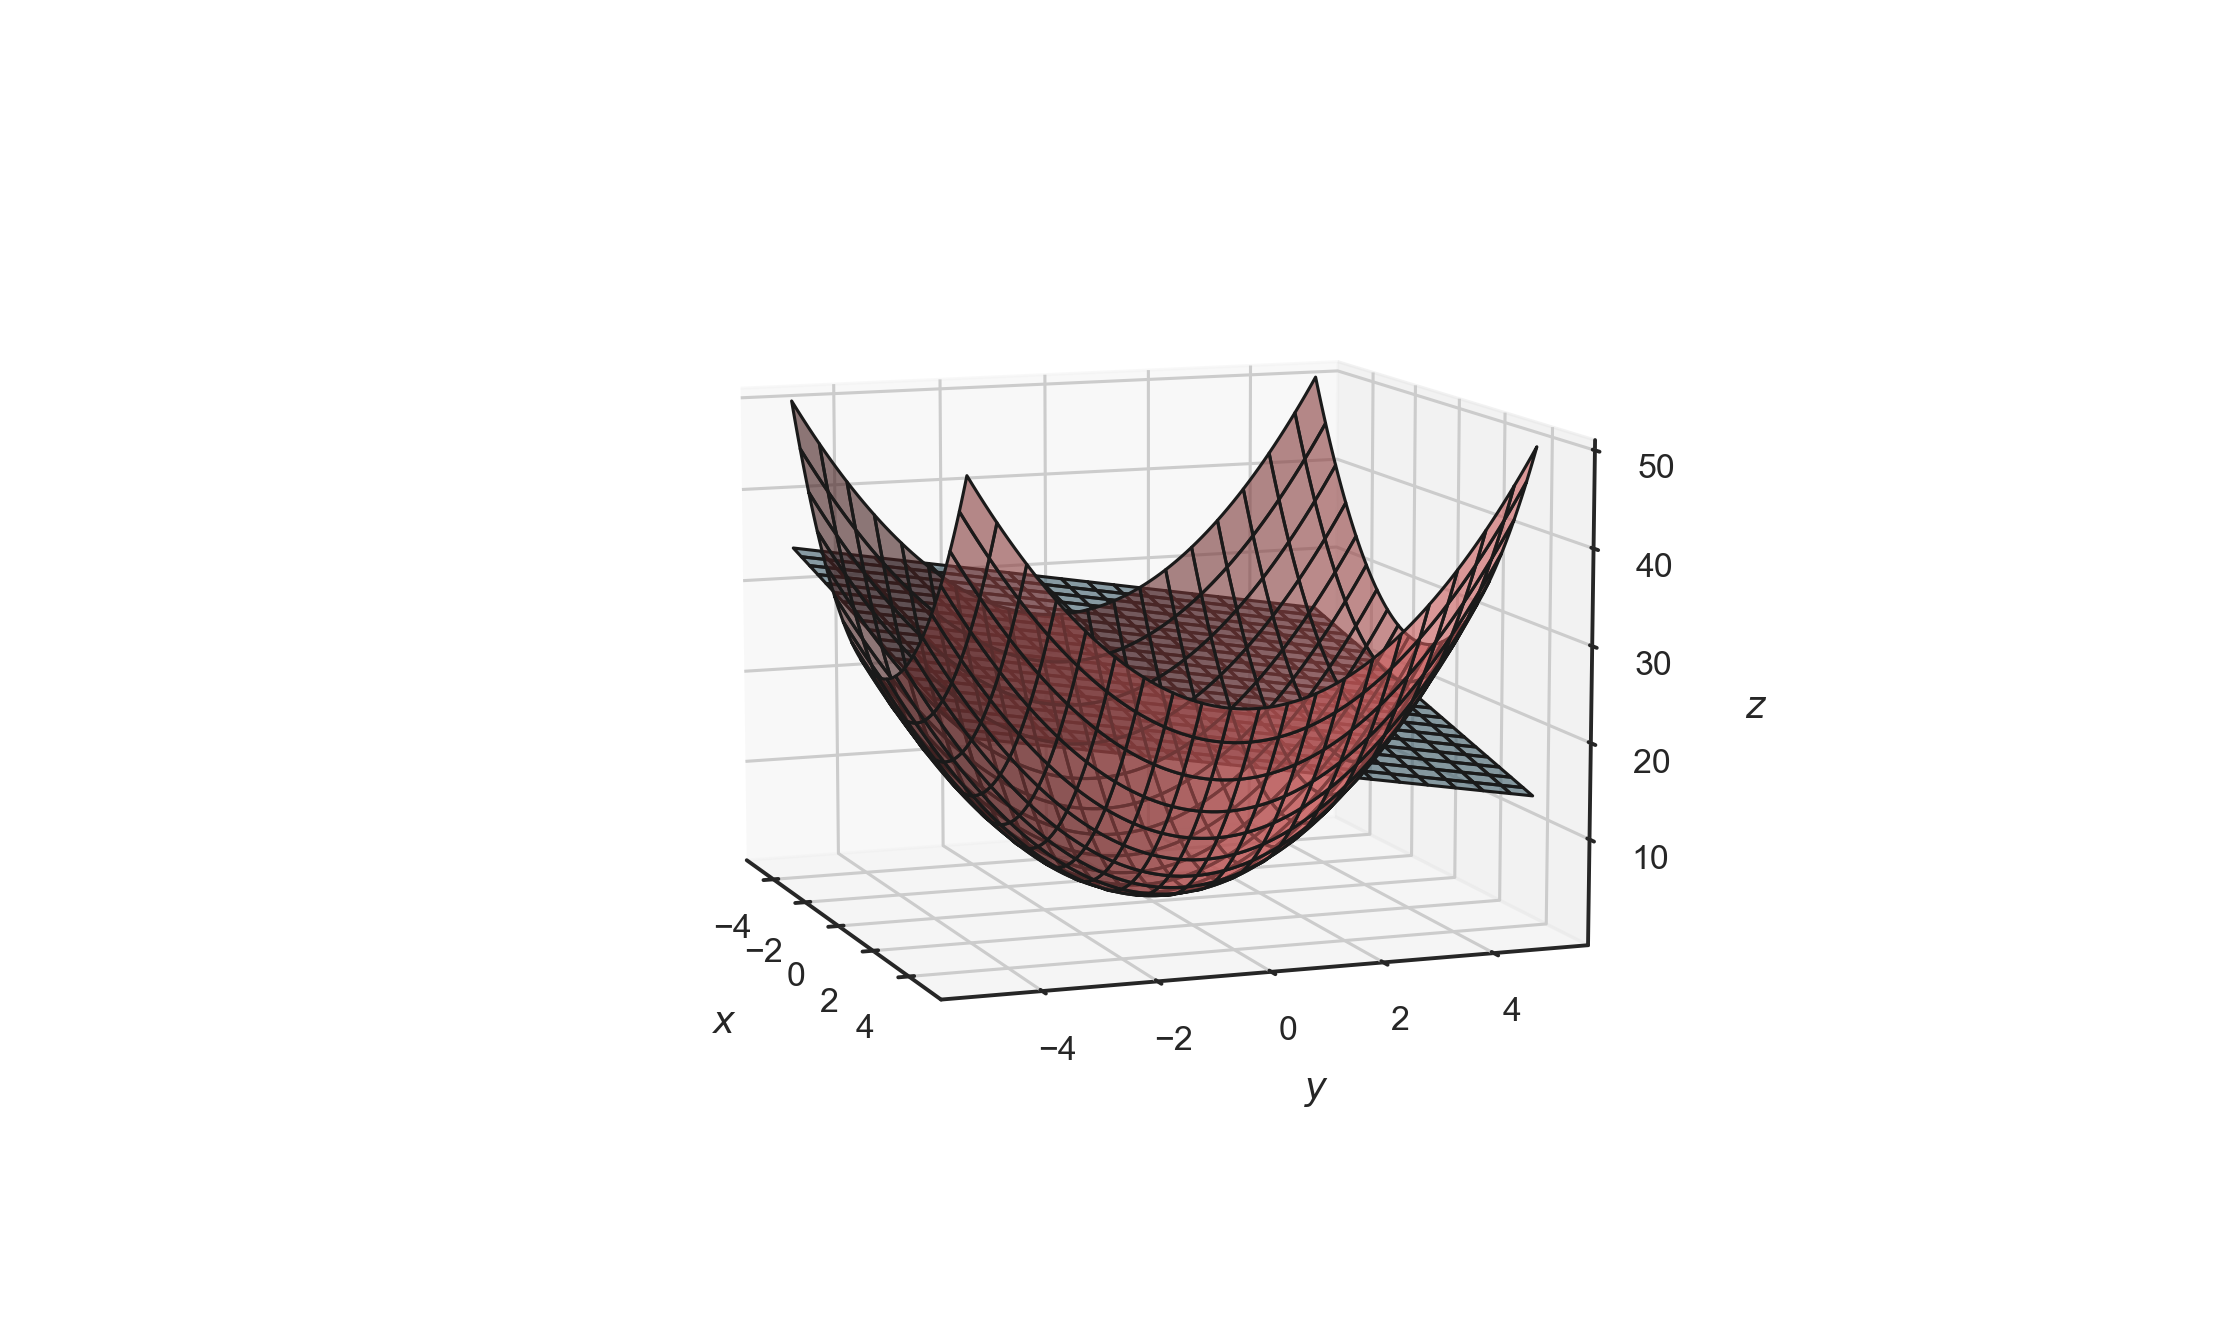

In [18]:
# Visualizamos la situación de este problema.
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=5, cstride=5, color='indianred', edgecolor='k', alpha=0.6)
ax.plot_surface(X, Y, h, rstride=5, cstride=5, color='skyblue', edgecolor='k', alpha=0.6)
ax.set_xlabel(r"$x$", fontsize=12, labelpad=10)
ax.set_ylabel(r"$y$", fontsize=12, labelpad=10)
ax.set_zlabel(r"$z$", fontsize=12, labelpad=10)
ax.view_init(10, -20);

Debido a que la intersección entre ambas superficies ocurre en el semiespacio superior, es evidente que $z\geq 0$. La función a optimizar es un distancia vertical con respecto al plano $XY$, por lo que estamos frente a un problema con dos restricciones, que podemos escribir como

$$\begin{array}{ll}\displaystyle \min_{\left( x,y,z\right)  } &f\left( x,y,z\right)  =z\\ \mathrm{s} .\mathrm{a} .:&z=x^{2}+y^{2}\\ &x+y+z=24\end{array}$$
</p> <p style="text-align: right;">$(3.9)$</p>

Consideremos pues las funciones $h_{1}(x,y,z)=z-x^{2}-y^{2}$ y $h_{2}(x,y,z)=x+y+z-24$. Conforme la Ec. (3.7), el lagrangiano de este problema tiene la forma

$$\begin{array}{lll}\mathcal{L} \left( \mathbf{x} ,\lambda_{j} \right)  &=&f\left( x,y,z\right)  +\displaystyle \sum^{2}_{j=1} \lambda_{j} h_{j}\left( x,y,z\right)  \\ &=&z+\lambda_{1} \left( z-x^{2}-y^{2}\right)  +\lambda_{2} \left( x+y+z-24\right)  \end{array}$$
</p> <p style="text-align: right;">$(3.10)$</p>

Podemos resolver este problema fácilmente por medio de un cálculo simbólico vía **Sympy**. Definimos primeramente las variables que constituyen el problema, incluyendo por supuesto los multiplicadores de Lagrange:

In [19]:
# Definimos las variables del problema (por separado las variables reales y los multiplicadores).
x, y, z = sp.symbols("x, y, z", real=True)
lam1, lam2 = sp.symbols(r"\lambda_{1}, \lambda_{2}", real=True)

Luego construimos el lagrangiano $\mathcal{L}$ usando las variables simbólicas anteriores:

In [20]:
# Construimos el lagrangiano.
L = z + lam1*(z - x**2 - y**2) + lam2*(x + y + z - 24)

In [21]:
# Mostramos la expresión resultante en pantalla.
L

Ahora calculamos las derivadas parciales del lagrangiano con respecto a las variables $(x, y, z)$ y a los multiplicadores $(\lambda_{1}, \lambda_{2})$:

In [22]:
# Derivadas parciales del lagrangiano.
dL_dx = L.diff(x)
dL_dy = L.diff(y)
dL_dz = L.diff(z)
dL_dlam1 = L.diff(lam1)
dL_dlam2 = L.diff(lam2)

Igualando las derivadas parciales a cero llegamos a un sistema no lineal de ecuaciones que podemos resolver rápidamente como sigue:

In [23]:
# Resolvermos el sistema completo.
result = sp.solve([dL_dx, dL_dy, dL_dz, dL_dlam1, dL_dlam2], [x, y, z, lam1, lam2], dict=True)

In [24]:
# Mostramos el resultado en pantalla.
result

Por lo tanto, tenemos dos puntos críticos: $P_{1}=(3,3,18)$ y $P_{2}=(-4,-4,32)$, que corresponden a los puntos dentro de la curva resultante de la intersección del plano con el paraboloide que corresponden a las distancias mínima y máxima de dicha curva con respecto al plano $XY$. Tales distancias son $z=18$ y $z=32$. ◼

### Caso restringido general: Condiciones de Karush-Kuhn-Tucker (KKT).

#### Definición.
Sea $f:U\subseteq \mathbb{R}^{n} \rightarrow \mathbb{R}$ una función definida en un conjuntp abierto $U$ de $\mathbb{R}^{n}$. Sean además las funciones $g,h:D\subseteq U \rightarrow \mathbb{R}$ funciones definidas en un conjunto abierto $D$ tal que $D\subseteq U$. El problema

$$\begin{array}{ll}\displaystyle \min_{\mathbf{x} } &f\left( \mathbf{x} \right)  \\ \mathrm{s} .\mathrm{a} .:&g_{i}\left( \mathbf{x} \right)  \leq 0\\ &h_{j}\left( \mathbf{x} \right)  =0\end{array}$$
</p> <p style="text-align: right;">$(3.11)$</p>

donde $1\leq i\leq m$ y $1\leq j\leq p$, es llamado **problema de optimización restringido general**. La función $f$ es la función objetivo del problema, el conjunto $g_{i}(\mathbf{x})\leq 0$ constituye sus restricciones de desigualdad, y el conjunto $h_{j}(\mathbf{x})=0$ constituye sus restricciones de igualdad. Asumimos, sin pérdida de generalidad, que $U$ (y, por extensión, $D$) es un conjunto convexo de $\mathbb{R}^{n}$ (es decir, es tal que, para todo par de puntos $P_{1}$ y $P_{2}$ de $U$, el segumento que une ambos puntos está siempre contenido en $U$). Es posible, de la misma forma que para el caso restringido incompleto, construir un lagrangiano para el problema (3.11), definido como

$$\begin{array}{llll}&\mathcal{L} \left( \mathbf{x} ,\mathbf{\mu } ,\mathbf{\lambda } \right)  &=&f\left( \mathbf{x} \right)  +\overbrace{\mathbf{\mu }^{\top } \mathbf{g} \left( \mathbf{x} \right)  +\mathbf{\lambda }^{\top } \mathbf{h} \left( \mathbf{x} \right)  }^{\mathbf{\alpha } =\left( \mathbf{\mu }^{\top } ,\mathbf{\lambda }^{\top } \right)  } \\ \Longrightarrow &\mathcal{L} \left( \mathbf{x} ,\mathbf{\alpha } \right)  &=&f\left( \mathbf{x} \right)  +\mathbf{\alpha }^{\top } \left( \begin{array}{l}\mathbf{g} \left( \mathbf{x} \right)  \\ \mathbf{h} \left( \mathbf{x} \right)  \end{array} \right)  \end{array}$$
</p> <p style="text-align: right;">$(3.12)$</p>

donde $\mathbf{g}(\mathbf{x})$ y $\mathbf{h}(\mathbf{x})$ son campos vectoriales definidos como $\mathbf{g}(\mathbf{x})=\left( g_{1}\left( \mathbf{x} \right)  ,...,g_{m}\left( \mathbf{x} \right)  \right)^{\top }$ y $\mathbf{h} \left( \mathbf{x} \right)  =\left( h_{1}\left( \mathbf{x} \right)  ,...,h_{p}\left( \mathbf{x} \right)  \right)^{\top }$.

#### Problema dual.
El valor mínimo del lagrangiano, a saber, $\mathcal{G}(\mathbf{\mu}, \mathbf{\lambda})=\min_{\mathbf{x} } \mathcal{L} \left( \mathbf{x} ,\mathbf{\mu } ,\mathbf{\lambda } \right)$, se denomina función lagrangiana dual asociada al problema (3.12). Los valores reunidos en los vectores $\mathbf{\mu}$ y $\mathbf{\lambda}$ son llamados **multiplicadores de Karush-Kuhn-Tucker** (o multiplicadores KKT). Es posible siempre definir un problema de optimización de sentido inverso al representado en (3.12), llamado **problema dual** asociado al problema original, definido como

$$\begin{array}{rl}\displaystyle \min_{\mathbf{\mu } ,\mathbf{\lambda } } &\mathcal{G} \left( \mathbf{\mu } ,\mathbf{\lambda } \right)  \\ \mathrm{s} .\mathrm{a} .:&\mu_{i} \geq 0\  ;\  1\leq i\leq m\end{array}$$
</p> <p style="text-align: right;">$(3.13)$</p>

El problema dual tiene las siguientes importantes propiedades:

* El problema dual siempre es convexo (incluso si el problema original, llamado **problema primal**, no lo es).
* Los valores óptimos de las funciones objetivo primal ($f^{\star}$) y dual ($\mathcal{G}^{\star}$) siempre verifican la **condición débil de dualidad**: $f^{\star}\geq \mathcal{G}^{\star}$.
* **Condición de Slater:** Para un problema primal de tipo convexo, si existe un valor $\mathbf{x}_{0}\in D$ tal que $g_{i}(\mathbf{x}_{0})<0$ para todo $i=1,...,m$, y $h_{j}(\mathbf{x}_{0})=0$ para todo $j=1,...,p$, entonces se cumple la **condición fuerte de dualidad**: $f^{\star}=\mathcal{G}^{\star}$.

Para toda solución primal factible $\mathbf{x}_{0}$, y para todo par de soluciones duales factibles $\mathbf{\mu}_{0}$ y $\mathbf{\lambda}_{0}$, la diferencia $f(\mathbf{x}_{0})-\mathcal{G}(\mathbf{\mu}_{0},\mathbf{\lambda}_{0})$ es llamada **brecha de dualidad** entre $\mathbf{x}_{0}$ y el par $(\mathbf{\mu}_{0},\mathbf{\lambda}_{0})$. La brecha de dualidad es una cantidad que permite redefinir la condición de Slater como sigue: Si la brecha de dualidad del problema (3.12) es cero, entonces se cumple la condición fuerte de dualidad: $f^{\star}=\mathcal{G}^{\star}$.

#### Condiciones de Karush-Kuhn-Tucker (KKT).
Dado el problema primal (3.12), definimos las **condiciones necesarias de Karush-Kuhn-Tucker** (o condiciones KKT) como un conjunto de relaciones que permiten definir los candidatos a solución de dicho problema. Estas condiciones pueden también ser suficientes si se cumplen ciertas restricciones asociadas al problema.

Las condiciones KKT se listan a continuación para un candidato a solución $\mathbf{x}_{0}\in U$:

* $\displaystyle \nabla f\left( \mathbf{x}_{0} \right)  +\sum^{m}_{i=1} \mu_{i} \nabla g_{i}\left( \mathbf{x}_{0} \right)  +\sum^{p}_{j=1} \lambda_{j} \nabla h_{j}\left( \mathbf{x}_{0} \right)  \ni 0$ (estacionariedad).
* $\mu_{i}g_{i}(\mathbf{x}_{0})$ para todo $i=1,...,m$ (holguras complementarias).
* $g_{i}\left( \mathbf{x}_{0} \right)  \leq 0,h_{j}\left( \mathbf{x}_{0} \right)  =0\  ;\  \forall i=1,...,m\wedge j=1,...,p$ (factibilidad primal).
* $\mu_{i}\geq 0$ para todo $i=1,...,m$ (factibilidad dual).

Sean $\mathbf{x}^{\star}$ y $(\mathbf{\mu}^{\star}, \mathbf{\lambda}^{\star})$ soluciones óptimas para los problemas primal y dual, respectivamente, con brecha de dualidad igual a cero (es decir, se cumple la condición fuerte de dualidad, por ejemplo, bajo la condición de Slater). Siendo así, es posible demostrar que

$$\begin{array}{lll}f\left( \mathbf{x}^{\star } \right)  &=&\mathcal{G} \left( \mathbf{\mu }^{\star } ,\mathbf{\lambda }^{\star } \right)  \\ &=&\min_{\mathbf{x} } \left[ f\left( \mathbf{x} \right)  +\left( \mathbf{\mu }^{\star } \right)^{\top }  \mathbf{g} \left( \mathbf{x} \right)  +\left( \mathbf{\lambda }^{\star } \right)^{\top }  \mathbf{h} \left( \mathbf{x} \right)  \right]  \\ &\leq &f\left( \mathbf{x}^{\star } \right)  +\left( \mathbf{\mu }^{\star } \right)^{\top }  \mathbf{g} \left( \mathbf{x}^{\star } \right)  +\left( \mathbf{\lambda }^{\star } \right)^{\top }  \mathbf{h} \left( \mathbf{x}^{\star } \right)  \\ &\leq &f\left( \mathbf{x}^{\star } \right)  \end{array}$$
</p> <p style="text-align: right;">$(3.14)$</p>

En otras palabras, todas estas desigualdades son, de hecho, igualdades. Al respecto, se tienen dos consecuencias importantes:

- El punto $\mathbf{x}^{\star}$ minimiza el valor del lagrangiano $\mathcal{L}(\mathbf{x},\mathbf{\mu}^{\star},\mathbf{\lambda}^{\star})$ sobre $U$. Por lo tanto, el gradiente de $\mathcal{L}(\mathbf{x},\mathbf{\mu}^{\star},\mathbf{\lambda}^{\star})$ debe anularse en $\mathbf{x}=\mathbf{x}^\star$. Esta es, de hecho, la condición KKT de estacionariedad.
- Debemos tener que $\left( \mathbf{\mu }^{\star } \right)^{\top }  \mathbf{g} \left( \mathbf{x} \right)=0$ y, dado que cada término en la suma resultante es negativo, esto implica que $\mu^{\star }_{i} g_{i}\left( \mathbf{x}^{\star } \right)  =0$ para cada $i=1,...,m$. Esta es, de hecho, la condición KKT de holguras complementarias.